# Seaborn: statisztikai adatvizualizálás
A seaborn python csomag alapverően a matplotlib-re épül, azt egészíti felhasználóbarát, hasznos funkciókkal a gyors és egyszerű vizualizációhoz.
Megtalálhatóak benne a leggyakoribb adatelemzéshez használt plot típusok, és nagyon jól működik együtt a Pandas Dataframe adattípussal is.

A szokásos módon telepíthető és importálható

    pip install seaborn
    
https://seaborn.pydata.org/examples/index.html

In [1]:
import seaborn as sns

## 1. Adatok eloszlásának megjelenítése
Az első lépésben egy adatsor eloszlását fogjuk elemezni. Hasznosak lehetnek ezek a plot típusok például mérési eredmények elemzéséhez, vagy érzékenységvizsgálathoz optimalizáció előtt, a megfelelő paraméterek megtalálásához.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1.1 Distplot
Az `sns.distplot()` egy adatsor eloszlását mutatja meg. Ehhez a seaborn-ból elérhető 'tips' példa adatsort fogjuk használni.
Már egy sor kóddal is hasznos információkat tartalmazó grafikonokhoz juthatunk.

d:\mizsakpeti\3_proj\09_mm_targy\python\python-plotting-econ\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

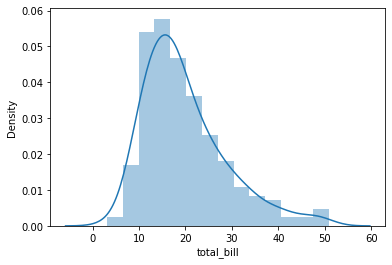

In [3]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

d:\mizsakpeti\3_proj\09_mm_targy\python\python-plotting-econ\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

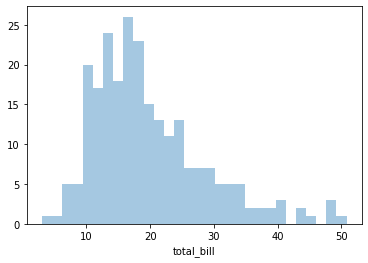

In [4]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### 1.2 Jointplot
Az `sns.jointplot()` alapvetően két eloszlás plotnak a kombinációja, amivel már két paraméter eloszlását is figyelhetjük egyszerre.

Többféle fomáji elérhetőek, amiket érdemes kipróbálgatni:
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

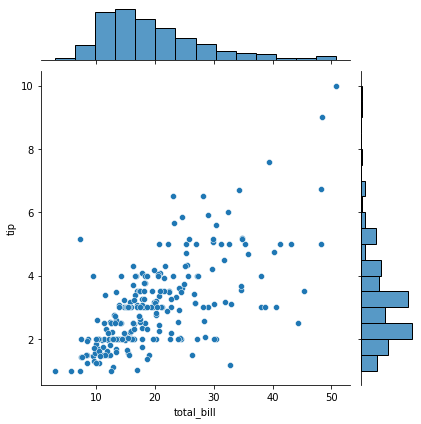

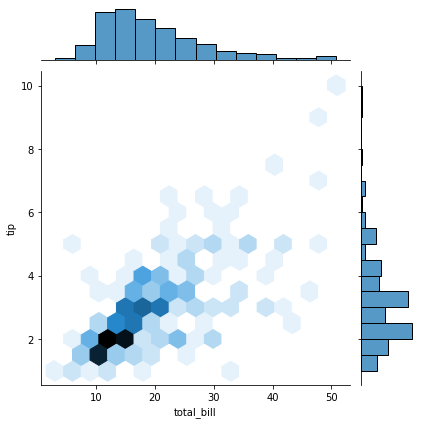

In [5]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

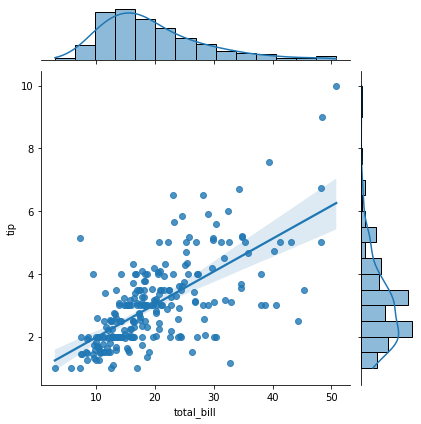

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### 1.3 Pairplot
A `sns.pairplot()` még a korábbi példáhhoz képest is egy nagyon kód-takarékos és gyors megjelenítésni módszer, hiszen minden paraméter összes másikkal nézett kölcsönhatását segít vizualizálni.

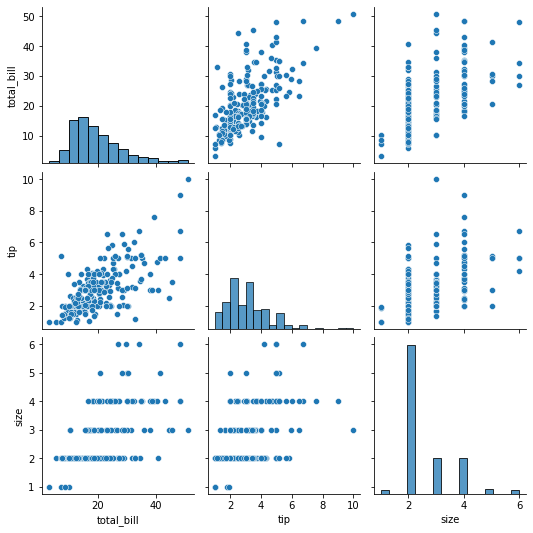

In [7]:
sns.pairplot(tips)

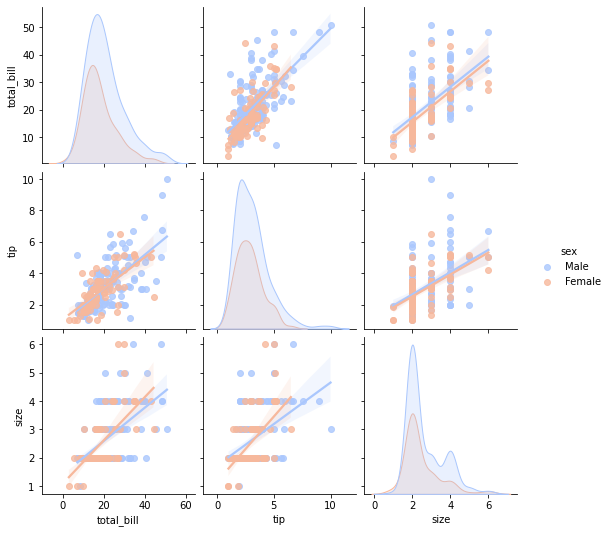

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm', kind='reg')

## 2. Kategorizált plotok
A fenti példában láttuk, hogy bizonyos paraméterek csak fix értékeket vehetnek fel, ezek esetében nem a legoptimálisabb a "szórás" típusú megjelenítés, ezért nézzünk pár példát, hogy ezeket az adatokat hogyan lehet hatékonyabban elemezni.

### 2.1 Barplot
A matplotlibhez készített barplot itt is elkészíthető, viszont itt az adatok valami függvény alapján vannak összesítva, ami alapból az 'átlag' de ez felülírható

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

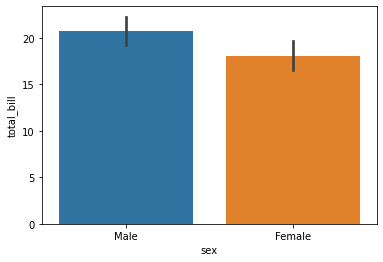

In [9]:
sns.barplot(x='sex',y='total_bill',data=tips)

Láttuk, hogy korábban egy sor kóddal egy egész plot-mátrixot készített nekünk a seaborn, de ha egy kicsit több beavatkozást szeretnénk, annak sincs semmi akadája, hiszen a plotok jelentős részének bemeneti argumentuma lehet a `matplotlib ax` objetum, amire aztán a seaborn a kért adatokat megjeleníti.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

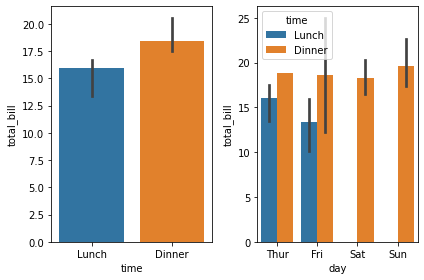

In [11]:
fig, axes = plt.subplots(1,2)
sns.barplot(x='time',y='total_bill',data=tips,ax=axes[0],estimator=np.median)
sns.barplot(x='day',y='total_bill',hue='time',data=tips,ax=axes[1],estimator=np.median)
plt.tight_layout()

### 2.2 Countplot
A `sns.coutplot()` nagyon hasonlít a korábbi oszlopdiagramhoz, viszont itt az előfordulások száma kerül megjelnítésre.

<AxesSubplot:xlabel='sex', ylabel='count'>

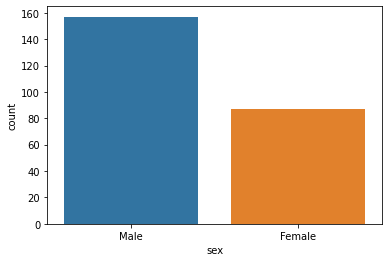

In [12]:
sns.countplot(x='sex',data=tips)

### 2.3 Box és violinplot
Ezt a két plottípust már a matplotlibnél is megnéztük, itt viszont kicsit más a szintaxis és több opciót érhetünk el nagyon kevés kóddal.

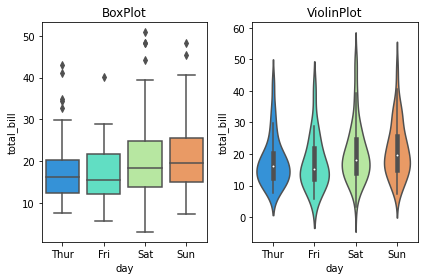

In [13]:
fig, axes = plt.subplots(1,2)
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow',ax=axes[0])
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow',ax=axes[1])
axes[0].set_title("BoxPlot")
axes[1].set_title("ViolinPlot")
plt.tight_layout()

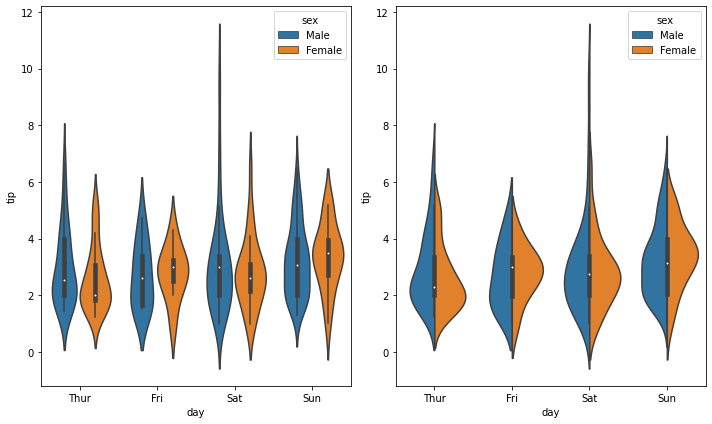

In [14]:
fig, axes = plt.subplots(1,2, figsize=(10,6))
sns.violinplot(x="day", y="tip",hue="sex", data=tips,ax=axes[0])
sns.violinplot(x="day", y="tip",hue="sex",split=True, data=tips,ax=axes[1])
plt.tight_layout()

### Egy kis érdekesség: swarmplot

<AxesSubplot:xlabel='tip', ylabel='day'>

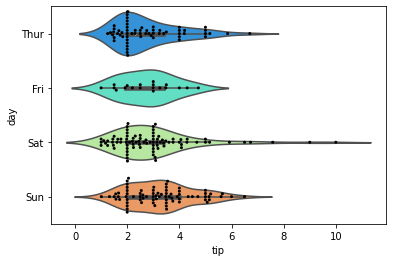

In [15]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## 3. Mátrix típusú plotok
A mátrix típusú plotok segítségével szín szerint kódolva jeleníthetünk meg adatokat. Sok esetben ez nagyon látványos módja eredmények vizualizálásának.

### 3.1 Heatmap
Az `sns.heatmap()` függvény bemenetének már egy kész mátrix formátumú dataframe-et kell megadni, és igazából csak az értékek alapján színezi a cellákat.

In [16]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

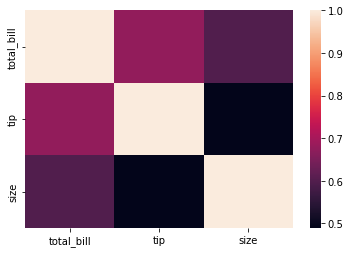

In [17]:
sns.heatmap(tips.corr())

<class 'matplotlib.axes._subplots.AxesSubplot'>


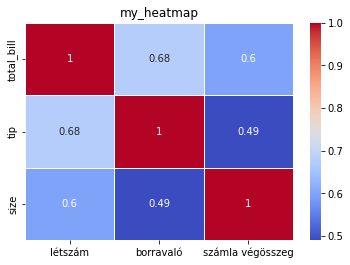

In [18]:
'''A seaborn visszetér egy matplotlib objektummal, amit tovább szerkeszthetünk.'''

ax = sns.heatmap(tips.corr(), cmap='coolwarm', linewidths=1, xticklabels=['létszám', 'borravaló', 'számla végösszeg'], annot=True)
print(type(ax))

ax.set_title('my_heatmap')
plt.show()

Az eddig használt borravalós adatsor nem túl látványos heatmap típusú vizualizációhoz, úgyhogy nézzünk egy másik adatsort...

In [19]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
pvflights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

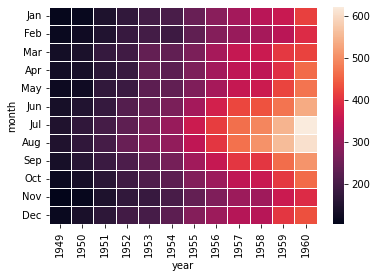

In [21]:
sns.heatmap(pvflights, linewidth=0.5, )

### 3.2 Clustermap
Az `sns.clustermap()` nagyon hasonlít a heatmapre, azzal a különbséggel, hogy a hasonló oszlopokat és sorokat egy clusterezési algoritmus szerint összepárosítja, így egymás mellett jelenítni meg.

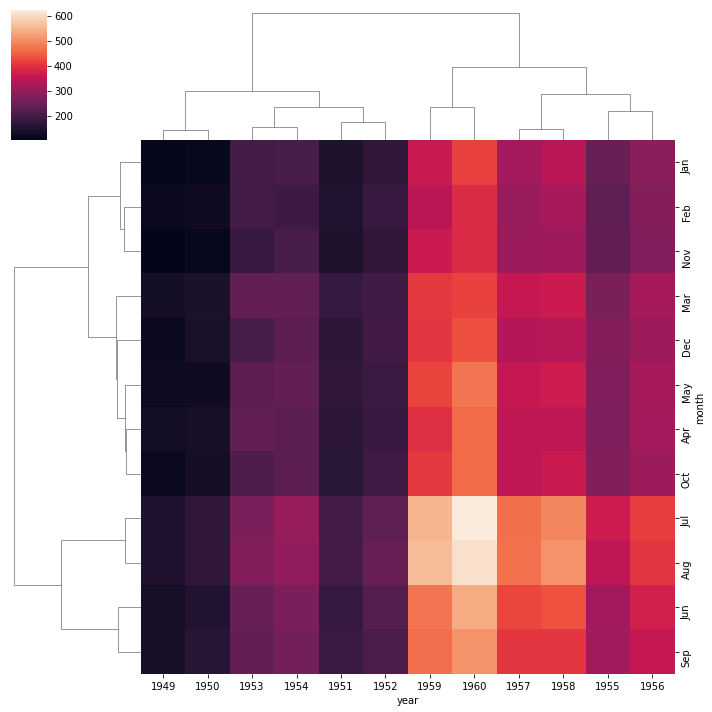

In [22]:
sns.clustermap(pvflights)

A klaszterezéshez használt elérhető módszerekről itt található további információ:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

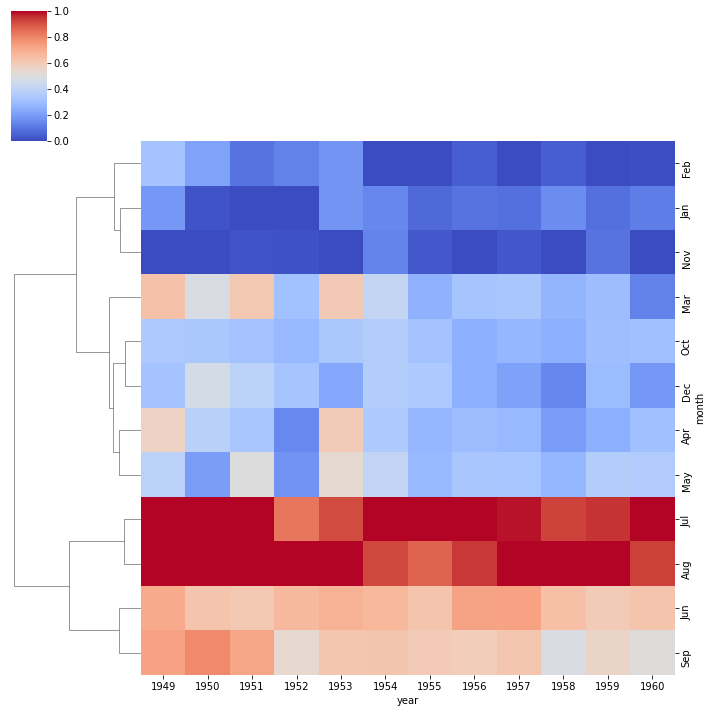

In [23]:
'''
Normalized, only cluesered for months.
'''
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1, col_cluster=False, method='weighted')
